In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/Pritam Laskar/Documents/PGCM - DA/Term II/Term II Study Materials/203 ML/Case 01 Linear Reg Labour Problem/LinearRegression_LabourProblem_Dataset.csv")

# Data Cleaning (EDA)

In [3]:
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [4]:
df.duplicated().sum()

2002

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Age              0
Eduacation       0
Race             0
Hisp             0
MaritalStatus    0
Nodeg            0
Earnings_1974    0
Earnings_1975    0
Earnings_1978    0
dtype: int64

In [8]:
df.dtypes

Age                int64
Eduacation        object
Race              object
Hisp              object
MaritalStatus     object
Nodeg              int64
Earnings_1974    float64
Earnings_1975    float64
Earnings_1978    float64
dtype: object

In [9]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,13990.000000,13990.000000,13990.000000,13990.000000,13990.000000
mean,32.323803,0.315440,13135.076957,12785.791457,14180.339610
std,11.003574,0.464707,9058.842572,8753.513408,9270.270498
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,4190.872000,4256.939750,5601.322750
50%,30.000000,0.000000,13808.910000,13385.345000,15233.145000
75%,41.000000,1.000000,21392.740000,20723.875000,23411.620000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


In [10]:
df['Nodeg'].unique()

array([1, 0], dtype=int64)

In [11]:
df['Nodeg'].value_counts()

0    9577
1    4413
Name: Nodeg, dtype: int64

In [12]:
df['Earnings_1974'] = df['Earnings_1974'].round(2)
df['Earnings_1975'] = df['Earnings_1975'].round(2)
df['Earnings_1978'] = df['Earnings_1978'].round(2)

In [13]:
df['Age']

0        45
1        21
2        38
3        48
4        18
         ..
15987    22
15988    20
15989    37
15990    47
15991    40
Name: Age, Length: 13990, dtype: int64

In [14]:
df.rename(columns = {'Eduacation':'Education'}, inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13990 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            13990 non-null  int64  
 1   Education      13990 non-null  object 
 2   Race           13990 non-null  object 
 3   Hisp           13990 non-null  object 
 4   MaritalStatus  13990 non-null  object 
 5   Nodeg          13990 non-null  int64  
 6   Earnings_1974  13990 non-null  float64
 7   Earnings_1975  13990 non-null  float64
 8   Earnings_1978  13990 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


In [16]:
df['Education'].unique()

array(['LessThanHighSchool', 'Intermediate', 'HighSchool', 'graduate',
       'PostGraduate'], dtype=object)

In [17]:
df['Education'].value_counts()

HighSchool            5348
LessThanHighSchool    4413
Intermediate          2333
graduate              1151
PostGraduate           745
Name: Education, dtype: int64

In [18]:
df['Race'].value_counts()

NotBlack    12841
black        1149
Name: Race, dtype: int64

In [19]:
df['MaritalStatus'].value_counts()

Married       9511
NotMarried    4479
Name: MaritalStatus, dtype: int64

In [20]:
df['Hisp'].value_counts()

NotHispanic    12851
hispanic        1139
Name: Hisp, dtype: int64

# Data Visualisation (EDA)

### Univariate Analysis

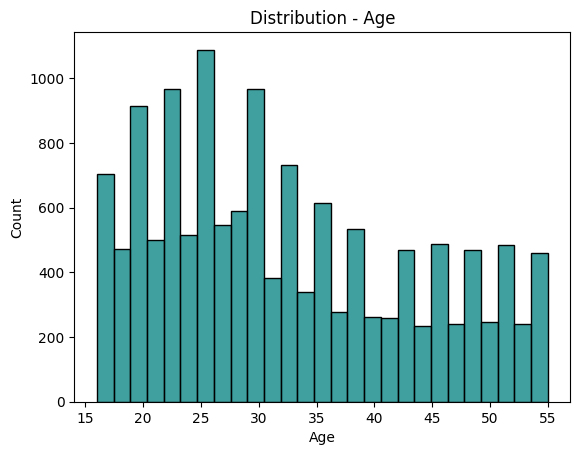

In [21]:
sns.histplot(data = df, x = 'Age', color = 'teal');
plt.title('Distribution - Age');

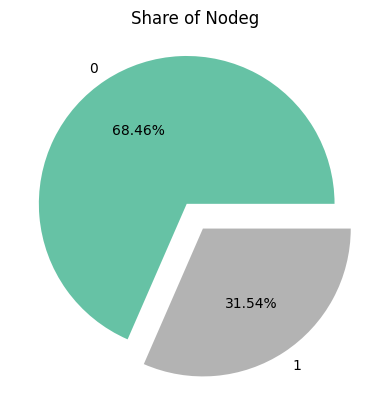

In [22]:
df['Nodeg'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = [0.1, 0.1], cmap = 'Set2');
plt.title('Share of Nodeg');
plt.xlabel('');
plt.ylabel('');

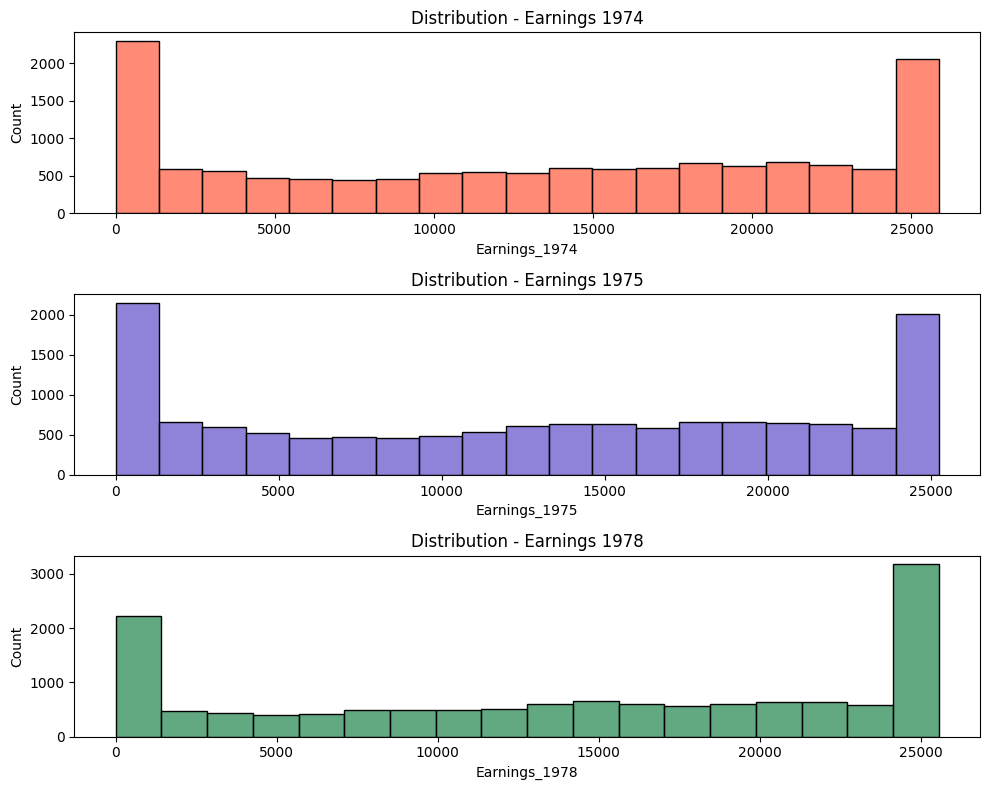

In [23]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (10,8))

# Subplot 1: Earnings 1974
sns.histplot(data = df, x = 'Earnings_1974', color = 'tomato', ax=axes[0]);
axes[0].set_title('Distribution - Earnings 1974');

# Subplot 2: Earnings 1975
sns.histplot(data = df, x = 'Earnings_1975', color = 'slateblue', ax=axes[1]);
axes[1].set_title('Distribution - Earnings 1975');

# Subplot 3: Eanings 1978
sns.histplot(data = df, x = 'Earnings_1978', color = 'seagreen', ax=axes[2]);
axes[2].set_title('Distribution - Earnings 1978');

plt.tight_layout()
plt.show()

### Multivariate Analysis

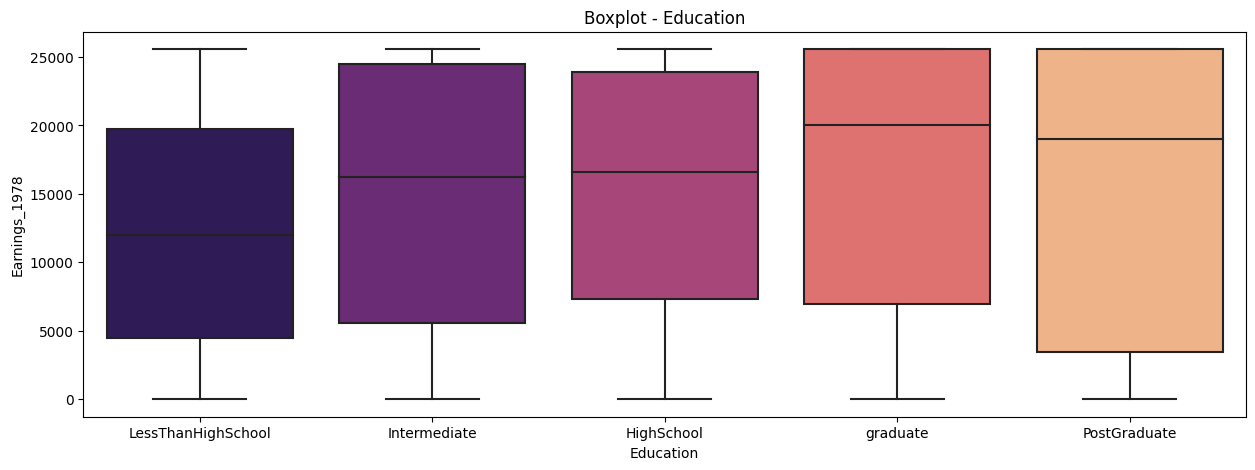

In [24]:
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x = 'Education', y = 'Earnings_1978', palette = 'magma');
plt.title('Boxplot - Education');

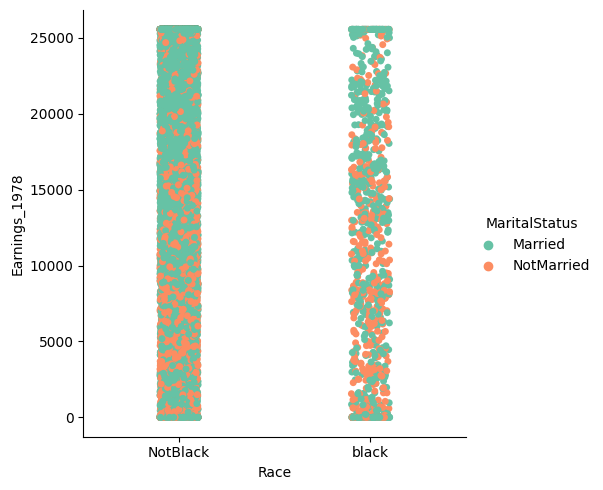

In [25]:
sns.catplot(data = df, y = 'Earnings_1978', x = 'Race', hue = 'MaritalStatus', palette = 'Set2')

<Figure size 1500x500 with 0 Axes>

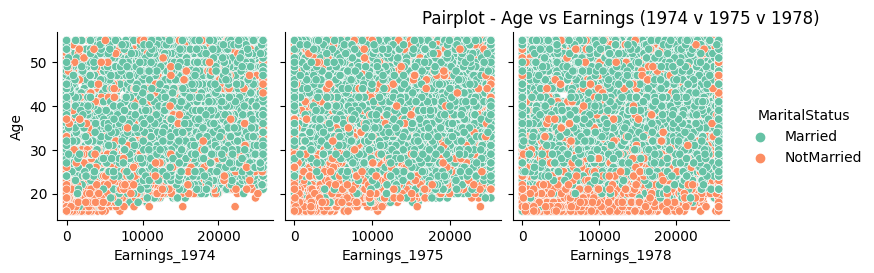

In [26]:
plt.figure(figsize = (15,5))
sns.pairplot(data = df, x_vars = ['Earnings_1974', 'Earnings_1975', 'Earnings_1978'], y_vars = 'Age', hue = 'MaritalStatus', palette = 'Set2');
plt.title('Pairplot - Age vs Earnings (1974 v 1975 v 1978)');


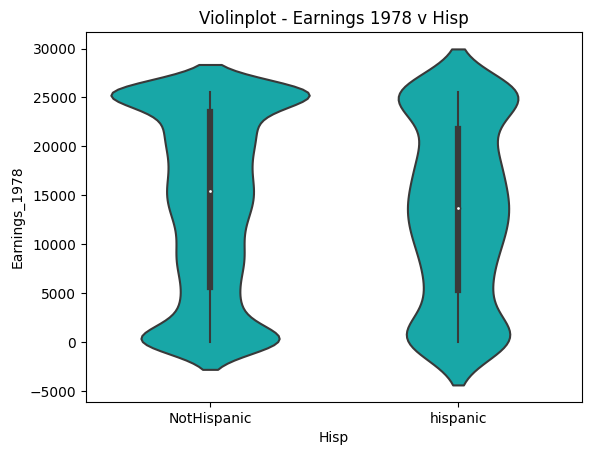

In [27]:
sns.violinplot(data = df, x = 'Hisp', y = 'Earnings_1978', color = 'c');
plt.title('Violinplot - Earnings 1978 v Hisp');

# Dummies and Multicollinearity Check

In [28]:
# Separating cat and num columns and calling dummy

df_cat = df.select_dtypes(include = 'object')
df_num = df.select_dtypes(include = np.number)
df_dummy = pd.get_dummies(df_cat, drop_first = True)
df_dummy

,Education_Intermediate,Education_LessThanHighSchool,Education_PostGraduate,Education_graduate,Race_black,Hisp_hispanic,MaritalStatus_NotMarried
0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
15987,0,0,0,0,1,0,1
15988,0,0,0,0,1,0,0
15989,0,0,0,0,0,0,1
15990,0,1,0,0,0,0,0


In [29]:
# Concat to merge dummy and num

data = pd.concat([df_dummy, df_num], axis = 1)
data

,Education_Intermediate,Education_LessThanHighSchool,Education_PostGraduate,Education_graduate,Race_black,Hisp_hispanic,MaritalStatus_NotMarried,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,0,1,0,0,0,0,0,45,1,21516.67,25243.55,25564.67
1,1,0,0,0,0,0,1,21,0,3175.97,5852.56,13496.08
2,0,0,0,0,0,0,0,38,0,23039.02,25130.76,25564.67
3,0,1,0,0,0,0,0,48,1,24994.37,25243.55,25564.67
4,0,1,0,0,0,0,0,18,1,1669.30,10727.61,9860.87
...,...,...,...,...,...,...,...,...,...,...,...,...
15987,0,0,0,0,1,0,1,22,0,3975.35,6801.44,2757.44
15988,0,0,0,0,1,0,0,20,0,1445.94,11832.24,6895.07
15989,0,0,0,0,0,0,1,37,0,1733.95,1559.37,4221.86
15990,0,1,0,0,0,0,0,47,1,16914.35,11384.66,13671.93


<Axes: >

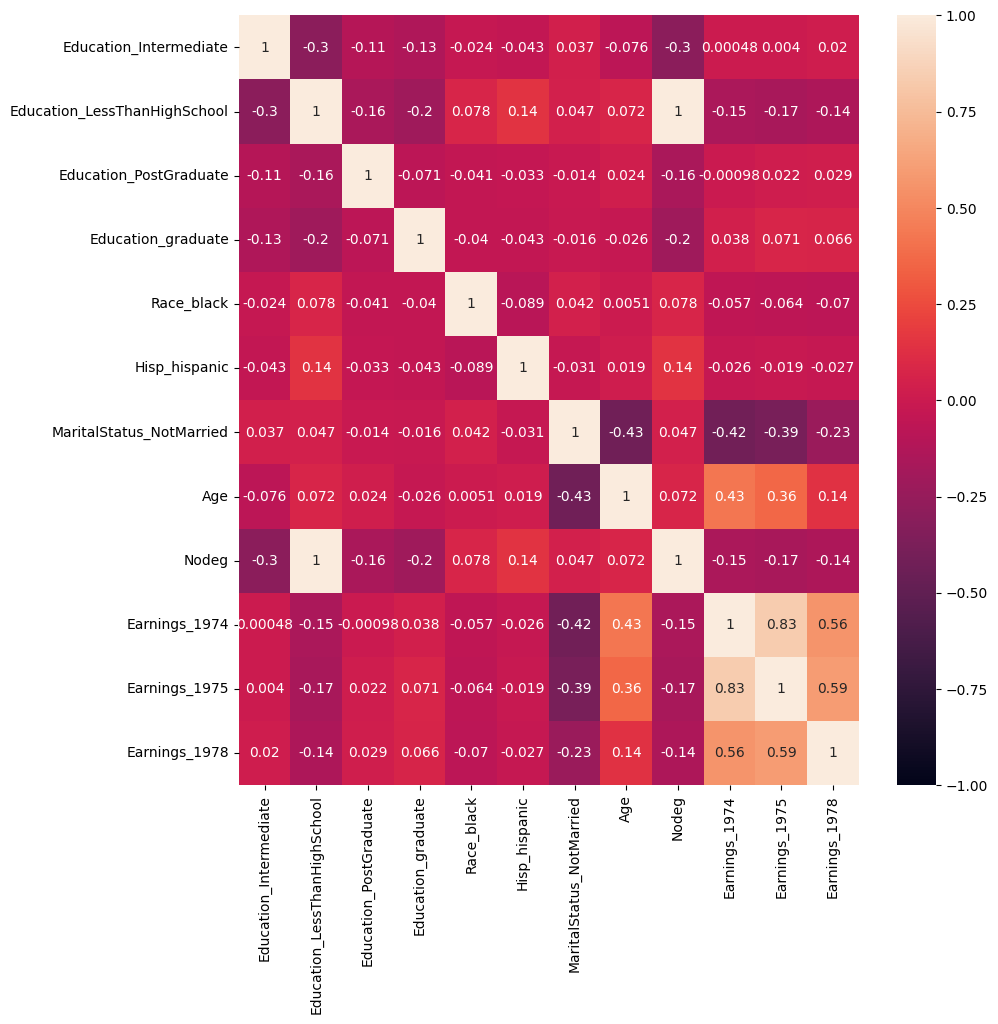

In [30]:
# Plotting heatmap to see if corr between any columns is 0.75+

plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True)

In [31]:
# Earnings 1974 and Earnings 1975 have multicollinearity between them, so we will call VIF to decide which one to drop

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data

""


In [32]:
vif_data['Features'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
vif_data

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,Education_Intermediate,1.366371
1,Education_LessThanHighSchool,inf
2,Education_PostGraduate,1.133628
3,Education_graduate,1.191441
4,Race_black,1.109295
5,Hisp_hispanic,1.119498
6,MaritalStatus_NotMarried,1.399069
7,Age,6.198574
8,Nodeg,inf
9,Earnings_1974,11.449884


In [33]:
# We will drop Earnings_1974 as its VIF is higher then VIF of Earnings 1975
data.drop(['Earnings_1974'], axis = 1, inplace = True)

<Axes: >

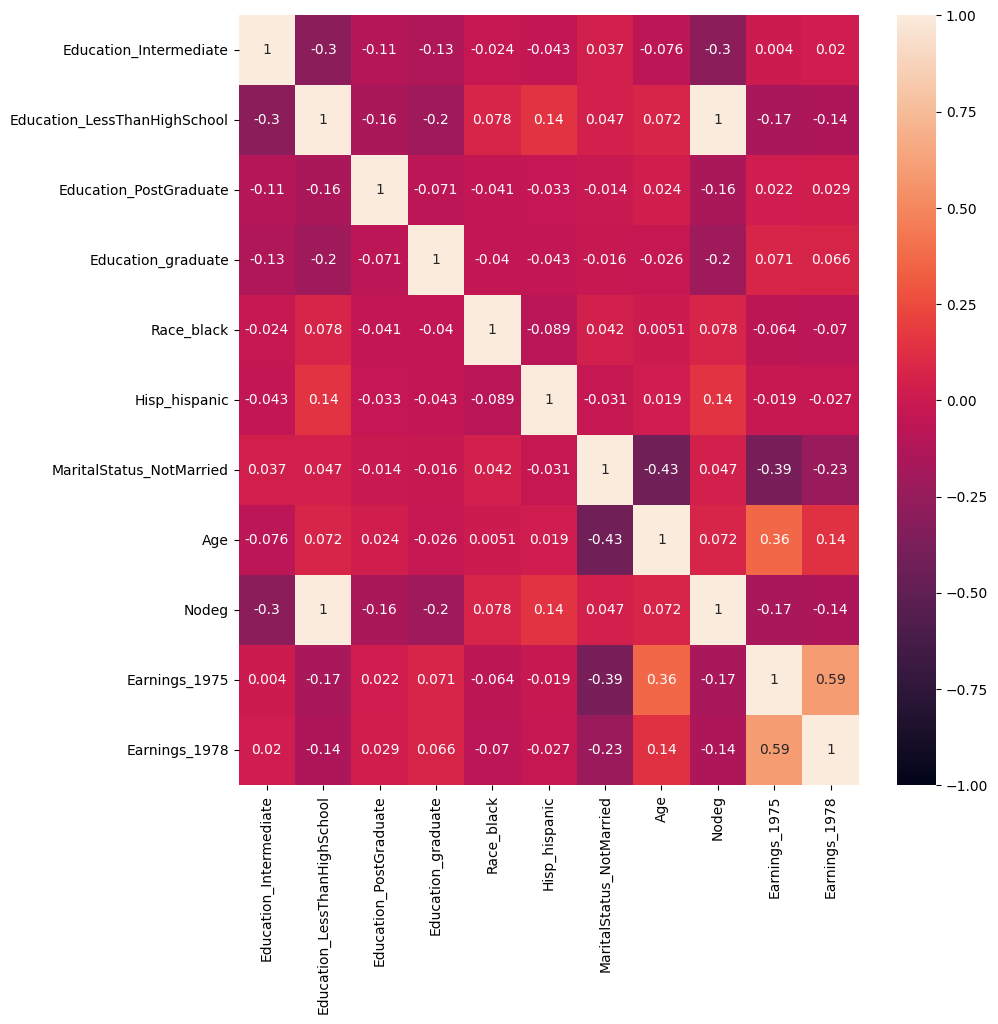

In [34]:
# Now we will call heatmap again to see if multicollineary still exist
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True)

As multicollinearity doesn't exist now, we will go ahead with our model

# Linear Regression

In [35]:
x = data.drop(['Earnings_1978'], axis = 1)
y = data['Earnings_1978']

In [36]:
x.head()

,Education_Intermediate,Education_LessThanHighSchool,Education_PostGraduate,Education_graduate,Race_black,Hisp_hispanic,MaritalStatus_NotMarried,Age,Nodeg,Earnings_1975
0,0,1,0,0,0,0,0,45,1,25243.55
1,1,0,0,0,0,0,1,21,0,5852.56
2,0,0,0,0,0,0,0,38,0,25130.76
3,0,1,0,0,0,0,0,48,1,25243.55
4,0,1,0,0,0,0,0,18,1,10727.61


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 10) 

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean Squared Error = ', mse)
print('R2 Score = ', r_squared)

Mean Squared Error =  56475566.80200762
R2 Score =  0.34579315681002565


In [39]:
import statsmodels.api as sm
X = sm.add_constant(x)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          Earnings_1978   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     885.8
Date:                Tue, 30 May 2023   Prob (F-statistic):               0.00
Time:                        10:42:04   Log-Likelihood:            -1.4449e+05
No. Observations:               13990   AIC:                         2.890e+05
Df Residuals:                   13980   BIC:                         2.891e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [40]:
# # As Hisp_hispanic and Education_Intermediate column's P>|t| is > 0.05 , we will drop them

x.drop(['Hisp_hispanic'], axis = 1, inplace = True)

In [41]:
X = sm.add_constant(x)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          Earnings_1978   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     996.0
Date:                Tue, 30 May 2023   Prob (F-statistic):               0.00
Time:                        10:42:04   Log-Likelihood:            -1.4449e+05
No. Observations:               13990   AIC:                         2.890e+05
Df Residuals:                   13981   BIC:                         2.891e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [42]:
# As Hisp_hispanic and Education_Intermediate column's P>|t| is > 0.05 , we will drop them

x.drop(['Education_Intermediate'], axis = 1, inplace = True)

In [43]:
x.shape

(13990, 8)

In [44]:
X = sm.add_constant(x)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          Earnings_1978   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     1138.
Date:                Tue, 30 May 2023   Prob (F-statistic):               0.00
Time:                        10:42:04   Log-Likelihood:            -1.4449e+05
No. Observations:               13990   AIC:                         2.890e+05
Df Residuals:                   13982   BIC:                         2.891e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [45]:
# Having reduced necessary columns, we will go ahead with Linear Regression model once again:

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 10)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean Squared Error = ', mse)
print('R2 Score = ', r_squared)

Mean Squared Error =  56471891.25258995
R2 Score =  0.3458357339760054


In [46]:
# Scale it using StandardScaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)
lr = LinearRegression()
lr.fit(x_train2, y_train)
y_pred2 = lr.predict(x_test2)

In [47]:
from sklearn.metrics import r2_score, mean_squared_error
mse_scaled = mean_squared_error(y_test, y_pred2)
r_squared_scaled = r2_score(y_test, y_pred2)
print('Scaled Mean Squared Error = ', mse_scaled)
print('Scaled R2 Score = ', r_squared_scaled)

Scaled Mean Squared Error =  56471891.25259037
Scaled R2 Score =  0.3458357339760004


In [48]:
y_pred2

array([15954.63647778,  6592.38091468, 11294.74684546, ...,
       14078.85783811,  4736.97700123, 22759.99210918])

In [49]:
print(len(y_test))
print(len(y_pred2))
y_test

2798
2798


1516     17540.61
737          0.00
3842     10295.32
14864     3252.48
15462    14780.22
           ...   
3960     24329.29
5854     19607.95
2841     13286.24
12483    15383.13
3646     14964.94
Name: Earnings_1978, Length: 2798, dtype: float64

In [50]:
# Lets make a dataframe to compare y_pred2 and y_test

pred_data = pd.DataFrame(np.column_stack((y_pred2, y_test)), columns=['Prediction', 'Test'])

In [51]:
# Lets compare our Prediction with Test:

pd.set_option('display.max_rows', None)
pred_data.sample(25)

,Prediction,Test
2676,20024.734952,7057.62
1335,8853.946425,19814.84
2480,16873.836971,0.00
1476,6324.863955,10258.38
1957,5651.557779,0.00
2415,6613.239951,0.00
1635,20988.015886,25564.67
969,9329.392074,10818.44
2174,9007.962239,10361.82
0,15954.636478,17540.61
